# Stima dell'Aspettativa di Vita

**Programmazione di Applicazioni Data Intensive** A.A. 2018/2019 

Laurea Magistrale in Ingegneria Elettronica e Telecomunicazioni per l'Energia  
Università di Bologna, Cesena

- Federico Di Luca 
- Andrea Bellanca
- Enrico Bertozzi

## Descrizione del Problema e Comprensione dei Dati
### Descrizione del Database

Si intende effettuare la previsione della variabile continua "Aspettativa di Vita" tramite regressione. Per tale analisi, si è scelto di utilizzare il dataset "Life Expectancy (WHO)", di Kaggle ( https://www.kaggle.com/augustus0498/life-expectancy-who ). 

- Di seguito si riporta una breve descrizione del dataset considerato.

L'archivio di dati Global Health Observatory (GHO) sotto Organizzazione Mondiale della Sanità (OMS) tiene traccia dello stato di salute, così come di molti altri fattori correlati allo stesso, per tutti i paesi del mondo. I dataset sono resi disponibili al pubblico ai fini dell'analisi dei dati sanitari. 
In particolare, il dataset considerato relativo all'aspettativa di vita, è stato redatto dallo stesso sito web dell'OMS, insieme al sito web di United Nation che ha contribuito raccogliendo i relativi dati economici riportati sullo stesso.

I singoli file di dati sono stati uniti in un unico dataset. Dall'ispezione visiva iniziale dei dati sono emersi alcuni valori mancanti. Poiché i set di dati erano dell'OMS, non sono stati riscontrati errori evidenti. La maggior parte dei dati mancanti riguardava la popolazione, l'epatite B e il PIL. Questi provenivano tutti da paesi meno conosciuti come Vanuatu, Tonga, Togo, Capo Verde ecc. Si è deciso dunque di escludere questi paesi dal set di dati del modello finale. 

Tra tutte le categorie di fattori legati alla salute sono stati scelti solo i fattori critici più rappresentativi. In definitiva, in questo progetto sono stati considerati i dati relativi al periodo 2000-2015 per 193 paesi. 
Il dataset finale è composto da 22 colonne e 2938 righe, 19 variabili predittive. Tutte le variabili predittive potranno poi essere di nuovo suddivise in ampie categorie: fattori legati all'immunizzazione, fattori di mortalità, fattori economici e fattori sociali.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # accessing directory structure

In [2]:
%matplotlib inline

In [3]:
import os.path
if not os.path.exists("led.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://raw.githubusercontent.com/data-intensive-team/data-intensive-unibo/1834fa4f71d802fc301f4c10013b65fa7b7ba8a0/led.csv", "led.csv") 
led = pd.read_csv("led.csv")

In [4]:
led.head(5)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Descrizione delle Feature
- Country: Nazione
- Year: Anno
- Status: Stato di sviluppo della Nazione
    - Developing: In via di sviluppo
    - Developed: Sviluppata
- Lifeexpectancy: Aspettativa di vita misurata
- AdultMortality: Tasso di mortalità fra 15 e 60 anni per 1000 persone
- infantdeaths: Morti neonatali ogni 1000 persone
- Alcohol: Consumo di alcol (in litri) pro capite
- percentageexpenditure: Spesa per la salute in percentuale del prodotto interno lordo (GDP) pro capite
- Hepatitis B: Copertura immunitaria dell'epatite B tra i bambini di 1 anno, in percentuale
- Measles: Numero di casi segnalati di morbillo su 1000 abitanti
- BMI: Indice medio di massa corporea dell'intera popolazione
- under-fivedeaths: Numero di morti sotto i cinque anni per 1000 abitanti
- Polio: Copertura immunitaria dalla polio tra i bambini di 1 anno, in percentuale
- Totalexpenditure: Spesa delle amministrazioni pubbliche per la sanità in percentuale della spesa pubblica totale
- Diphtheria: Copertura vaccinale contro la tossicità del tetano e della pertosse (DTP3) tra i bambini di 1 anno, in percentuale
- HIV/AIDS: Numero di decessi su 1000 nati, dovuti all' HIV/AIDS (0-4 anni)
- GDP: Prodotto Interno Lordo (in USD)
- Population: Popolazione della Nazione
- thinness1-19 years: Prevalenza della magrezza tra bambini e adolescenti tra 10 e 19, in percentuale
- thinness5-9 years: Prevalenza della magrezza tra bambini e adolescenti tra 5 e 9 anni, in percentuale
- Incomecompositionofresources: Indice di sviluppo umano in termini di composizione del reddito delle risorse
    - Compreso tra 0 e 1
- Schooling: Numero medio di anni di istruzione per abitante

## Analisi Esplorativa dei Dati

In [5]:
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2385 non-null float64
Measles                         2938 non-null int64
BMI                             2904 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2919 non-null float64
Totalexpenditure                2712 non-null float64
Diphtheria                      2919 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2490 no

- Come già accennato, il numero delle istanze contenute nel dataset è 2938
- Il numero totale delle feature è 22, compresa la variabile "Life expectancy" da predirre

In [6]:
led.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


- Si sono riportate media, deviazione standard e percentili per tutte le feature considerate
- Si riportano di seguito le istanze mancanti e le relative percentuali per categoria sul totale

In [7]:
total = led.isnull().sum().sort_values(ascending=False)
percent_1 = led.isnull().sum()/led.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(14)

,Total,%
Population,652,22.2
HepatitisB,553,18.8
GDP,448,15.2
Totalexpenditure,226,7.7
Alcohol,194,6.6
Incomecompositionofresources,167,5.7
Schooling,163,5.5
BMI,34,1.2
thinness1-19years,34,1.2
thinness5-9years,34,1.2


- Come premesso nell'introduzione, poiché i set di dati erano dell'OMS non sono stati riscontrati errori evidenti. La maggior parte dei dati mancanti riguardava la popolazione, l'epatite B e il PIL. Questi provengono tutti da paesi meno conosciuti come Vanuatu, Tonga, Togo, Capo Verde ecc.. che si è deciso dunque di escludere dal set di dati del modello finale. 

In [8]:
led.dropna(inplace=True) 

- Ci liberiamo delle righe con dati mancanti
- Sono riportati di seguito i dati relativi all'Italia, nel periodo considerato tra il 2000 e il 2014. Si nota come:
    - L'aspettativa di vita sia aumentata nel corso degli anni
    - La mortalità in età adulta sia calata del 20%
    - Le coperture vaccinali siano cambiate di pochi punti percentuali
    - La spesa per la sanità sia aumentata
    - Il numero medio di anni di istruzione per abitante sia cresciuto

In [9]:
led_by_country = led.groupby("Country")
led_by_country.get_group("Italy").sort_values("Year", ascending=True)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
1297,Italy,2000,Developed,79.4,77.0,3,9.78,31.505822,94.0,1457,...,97.0,7.91,87.0,0.1,251.24260,5694218.0,0.5,0.5,0.823,14.8
1296,Italy,2001,Developed,79.8,75.0,2,9.69,3.122230,95.0,0,...,96.0,8.11,93.0,0.1,24.81900,569741.0,0.5,0.5,0.828,14.9
1295,Italy,2002,Developed,80.0,72.0,2,9.25,2883.334911,95.0,9385,...,96.0,8.23,93.0,0.1,22196.57360,57597.0,0.5,0.5,0.836,15.2
1294,Italy,2003,Developed,79.9,72.0,2,9.30,3519.258515,95.0,10982,...,97.0,8.17,96.0,0.1,27387.22580,5731323.0,0.5,0.5,0.841,15.4
1293,Italy,2004,Developed,89.0,66.0,2,8.98,4270.914882,96.0,599,...,97.0,8.49,94.0,0.1,31174.56118,57685327.0,0.5,0.5,0.846,15.6
1292,Italy,2005,Developed,88.0,66.0,2,8.65,4506.255963,96.0,135,...,97.0,8.71,95.0,0.1,31959.26215,57969484.0,0.5,0.5,0.851,15.8
1291,Italy,2006,Developed,81.2,65.0,2,8.44,473.191545,96.0,439,...,97.0,8.82,96.0,0.1,3341.74820,58143979.0,0.5,0.5,0.856,16.0
1290,Italy,2007,Developed,81.3,63.0,2,8.37,5228.821581,97.0,321,...,97.0,8.48,97.0,0.1,37698.78573,5843831.0,0.5,0.5,0.862,16.1
1289,Italy,2008,Developed,81.5,61.0,2,7.96,66.378405,96.0,1617,...,96.0,8.89,96.0,0.1,464.18465,58826731.0,0.5,0.5,0.866,16.3
1288,Italy,2009,Developed,81.6,61.0,2,7.25,5243.316638,96.0,351,...,96.0,9.41,96.0,0.1,36976.84512,5995365.0,0.5,0.5,0.868,16.3


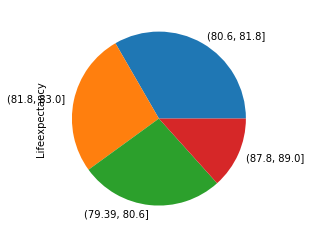

In [10]:
led_country = led[["Country","Lifeexpectancy"]]
led_Italy = led_country.loc[led_country["Country"]=="Italy"]
pd.cut(led_Italy["Lifeexpectancy"], 8).value_counts().plot.pie()

- Dal grafico a torta si nota come, in Italia, l'aspettativa di vita sia sempre stata circa intorno agli 81 anni
    - Eccezion fatta per il 2004 e il 2005, anni particolarmente longevi

- Si stampano a schermo ora le distribuzioni di tutte le variabili

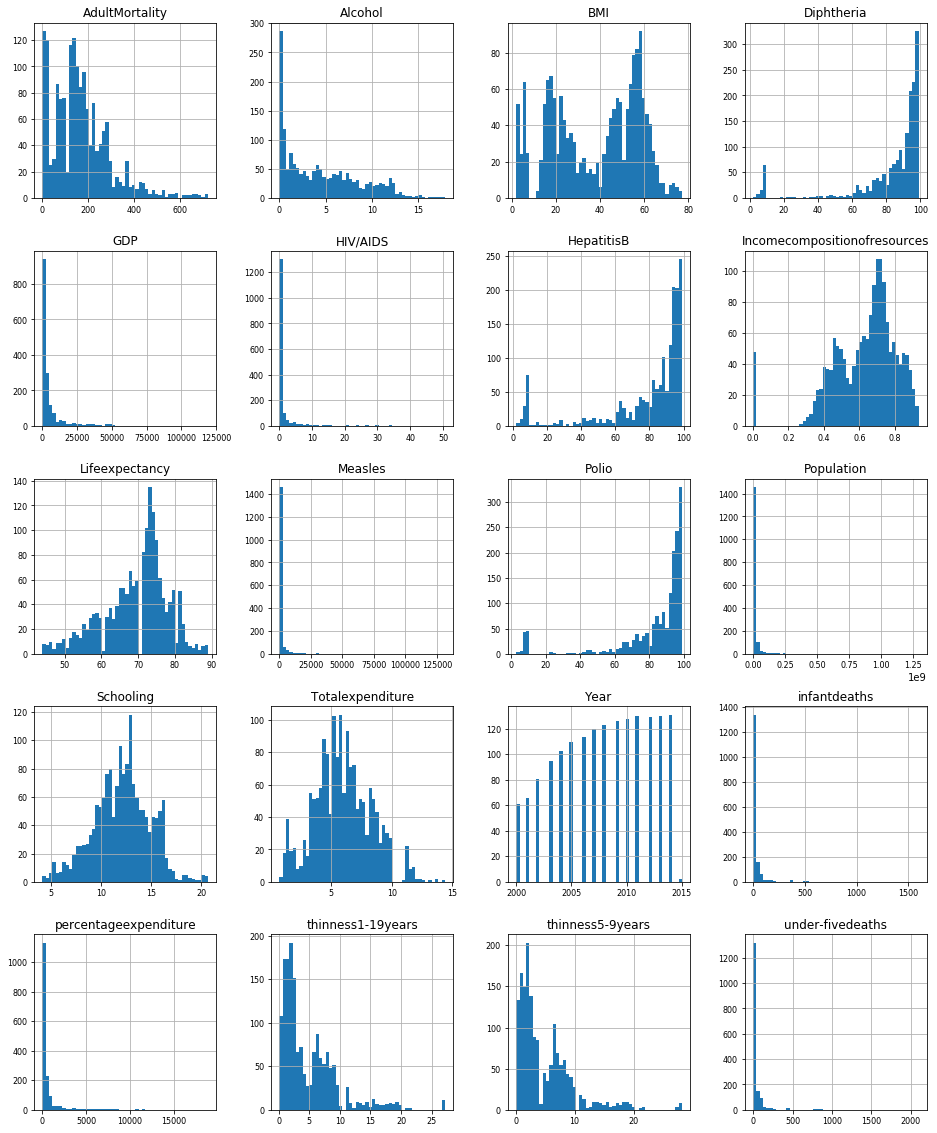

In [11]:
led.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # Ora li stampiamo tutti

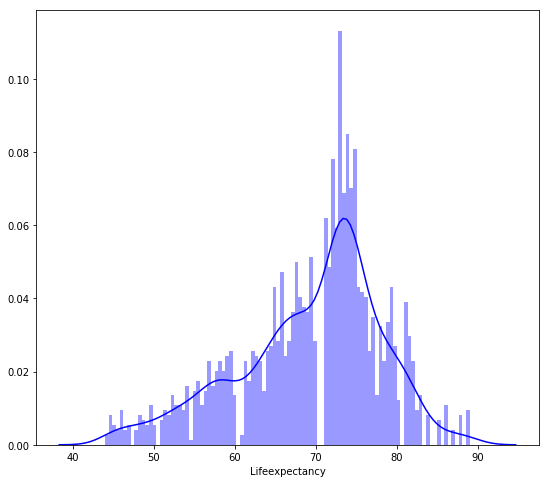

In [12]:
plt.figure(figsize=(9, 8))
sns.distplot(led['Lifeexpectancy'], color='b', bins=100, hist_kws={'alpha': 0.4});

- La distribuzione dell'aspettativa di vita è simile alla composizione di più gaussiane con:
    - Valor medio 69,22
    - Deviazione Standard 9,52
- I valori minimo e massimo mai registrati, sono rispettivamente
    - 36.3 Haiti (2010)
    - 89.0 per alcuni anni dei paesi più sviluppati come Francia, Italia e Giappone

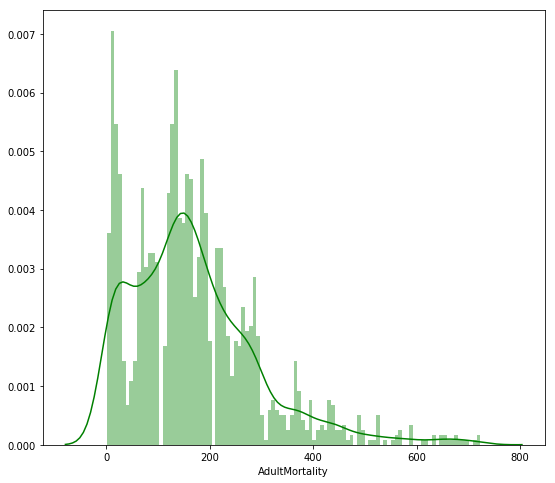

In [13]:
plt.figure(figsize=(9, 8))
sns.distplot(led['AdultMortality'], color='g', bins=100, hist_kws={'alpha': 0.4});

- Si è riportata la distribuzione della mortalità in età adulta
    - Valor medio 164.80
    - Deviazione Standard 124.29

### Correlazione tra le Variabili
- Per quantificare la correlazione, si è utilizzato il _coefficiente di correlazione di Pearson_
- Date due variabili casuali $X$ e $Y$, il coefficiente è dato dal rapporto tra la loro covarianza $\sigma_{XY}$ e il prodotto delle deviazioni standard $\sigma_X$ e $\sigma_Y$
$$ \rho(X,Y) = \frac{\sigma_{XY}}{\sigma_X\sigma_Y} $$
- Data una serie di campioni $(x_1,y_1),\ldots,(x_n,y_n)$ delle due variabili con medie $\mu_X$ e $\mu_Y$, la correlazione si può stimare come
$$ \frac{\sum_{i=1}^n{(x_i-\mu_X)\cdot(y_i-\mu_Y)}}{n\cdot\sigma_X\cdot\sigma_Y} $$

- Il coefficiente ha un valore compreso tra 1 e -1, dove
  - valori vicini a 1 indicano correlazione diretta (Y cresce al crescere di X)
  - valori vicini a -1 indicano correlazione inversa (Y descresce al crescere di X)
  - valori vicini a 0 indicano assenza di correlazione

- Si riporta ad esempio la correlazione tra la mortalità in età adulta e il consumo di alcol

In [14]:
Alcohol = led["Alcohol"].values
AdultMortality = led["AdultMortality"].values

def mycorrelation(X,Y):
    return np.mean((X-X.mean()) * (Y-Y.mean())) / (X.std() * Y.std())

mycorrelation(Alcohol, AdultMortality)

-0.17553508575848253

In [15]:
led1 = led
led1.drop(["Country", "Status", "Year"], axis=1, inplace=True)

- Applicando la discretizzazione delle feature Country, Status e Year, si è visto che l'accuratezza dei modelli cambia di poco e non sempre migliora
    - Mentre si complica il processo di addestramento del modello
    - Queste feature sono state quindi escluse dall'addestramento del modello
- Si riportano di seguito i valori delle correlazioni tra tutte le feature prese in considerazione, in formato tabellare

In [16]:
df = led1.corr()
df

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
Lifeexpectancy,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
AdultMortality,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infantdeaths,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentageexpenditure,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
HepatitisB,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-fivedeaths,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013
Polio,0.327294,-0.199853,-0.156929,0.240315,0.128626,0.463331,-0.057850,0.186268,-0.171164,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147


Di seguito si utilizza la classe *sns.heatmap*, con la quale si grafica la precedente matrice di correlazione. In base a quanto due variabili siano correlate fra loro il pixel del grafico assumerà un colore secondo la scala indicata a fianco. In particolare, si mostrano solo quelle variabili che presentano una correlazione maggiore di 0.4 in valore assoluto per chiarezza.

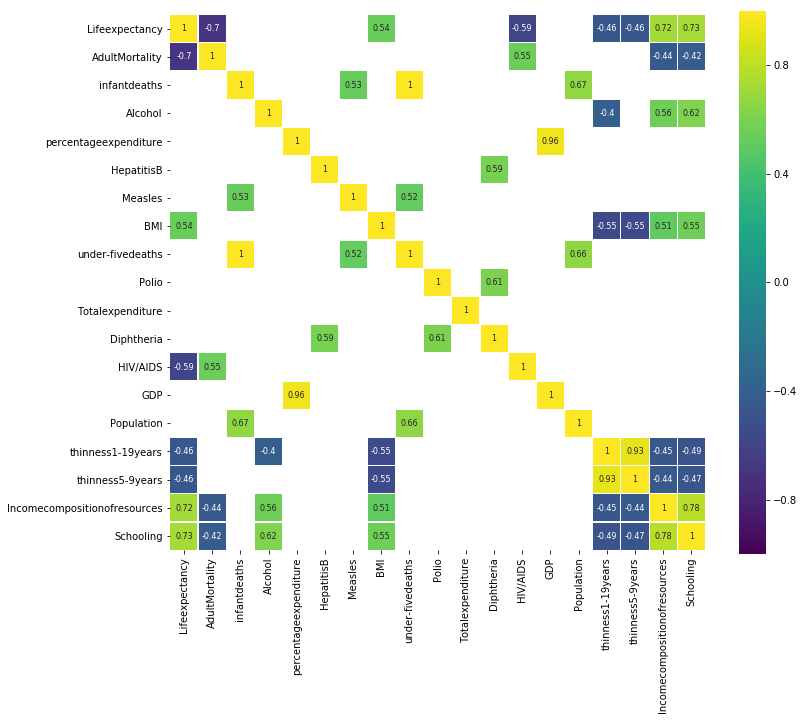

In [17]:
plt.figure(figsize=(12, 10))

sns.heatmap(df[(df >= 0.5) | (df <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- Si nota, ad esempio, che la correlazione tra il consumo di alcol e la mortalità in età adulta non è alta quanto ci si aspettava
- Risulta invece evidente la correlazione tra aspettativa di vita e anni di istruzione e tra PIL e Spesa per la salute

Si visualizzano a schermo tutti i grafici scatter fra le diverse coppie di features

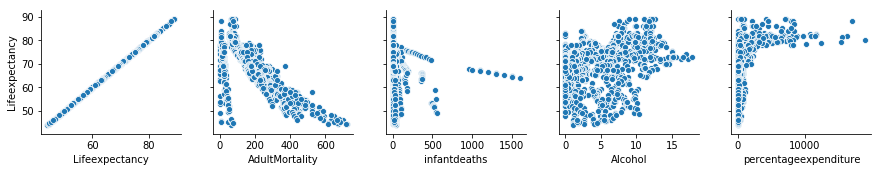

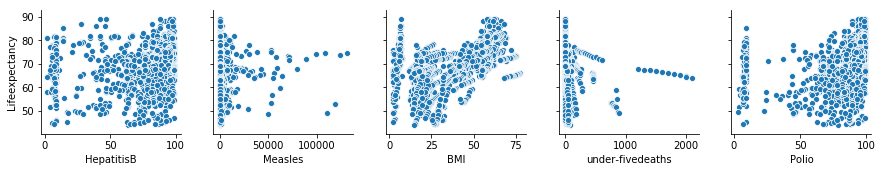

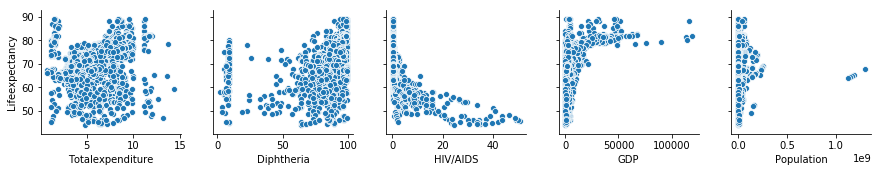

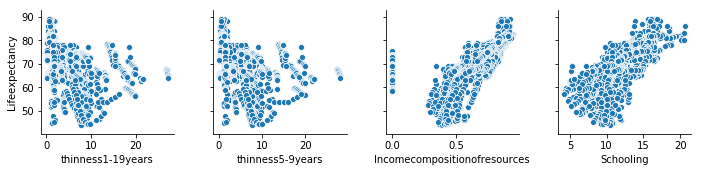

In [18]:
for i in range(0, len(led1.columns), 5):
    sns.pairplot(data=led1,
                x_vars=led1.columns[i:i+5],
                y_vars=['Lifeexpectancy'])

- Si riportano ora le 5 feature più correlate con l'Aspettativa di Vita

In [19]:
df_num_corr = led.corr()['Lifeexpectancy'][1:] # tolta la prima visto che è l'aspettativa di vita stessa
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Ecco le {} feature più correlate con l'Aspettativa di Vita:\n{}".format(len(golden_features_list), golden_features_list))

Ecco le 5 feature più correlate con l'Aspettativa di Vita:
Schooling                       0.727630
Incomecompositionofresources    0.721083
BMI                             0.542042
HIV/AIDS                       -0.592236
AdultMortality                 -0.702523
Name: Lifeexpectancy, dtype: float64


- Si esegue lo Zoom su qualche coppia di variabili la cui correlazione risulti significativa

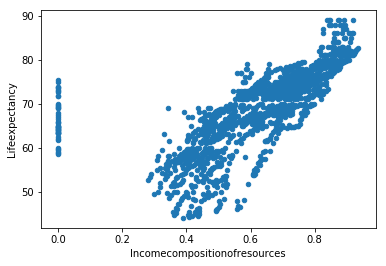

In [20]:
led.plot.scatter("Incomecompositionofresources","Lifeexpectancy")

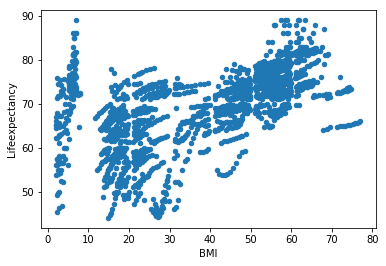

In [21]:
led.plot.scatter("BMI","Lifeexpectancy")

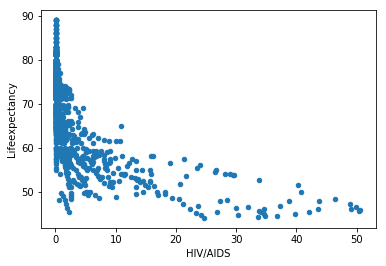

In [22]:
led.plot.scatter("HIV/AIDS","Lifeexpectancy")

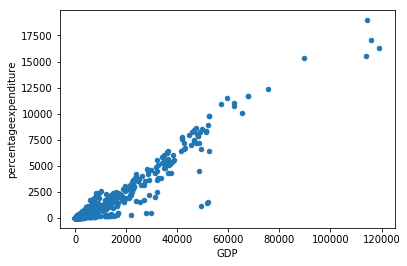

In [23]:
led.plot.scatter("GDP","percentageexpenditure")

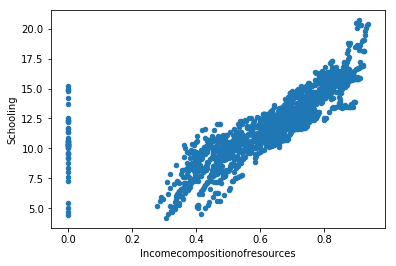

In [24]:
led.plot.scatter("Incomecompositionofresources","Schooling")

## Valutazione dei Modelli di Regressione 
### Metodo Hold-Out
Al fine di valutare il modello generato, si prendono in considerazione i seguenti parametri:
- Errore Quadratico Medio, utilizzato come criterio per individuare il modello migliore
$$ \mathrm{MSE} = \frac{1}{m}\sum_{i=1}^n\left(h(\mathbf{x}_i)-y_i\right)^2 $$
- Errore Relativo, che misura intuitivamente di quanto il modello si sbaglia in percentuale rispetto al valore reale
$$ \mathrm{errore} = \frac{1}{m}\sum_{i=1}^m\left\vert\frac{h(\mathbf{x}_i)-y_i}{y_i}\right\vert $$
- _Coefficiente di determinazione_ $R^2$ è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati ($\bar{y}$ = media di $Y$)
$$ R^2 = \frac{\sum_{i=1}^m{\left(y_i-\hat{y}_i\right)^2}}{\sum_{i=1}^m{\left(y_i-\bar{y}\right)^2}} $$

In [25]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    print("   Mean squared error: {:.5}".format(mean_squared_error(model.predict(X), y)))
    print("       Relative error: {:.5%}".format(relative_error(model.predict(X), y)))
    print("R-squared coefficient: {:.5}".format(model.score(X, y)))

- Verrà diviso il daset in training set e validation set
- Si considera come variabile dipendente y l'aspettativa di vita
- Si considera come variabile indipendente X il solo numero medio di anni di istruzione per abitante

## Regressione Polinomiale Univariata
### Regolarizzazione e Regressione Ridge

Di seguito si è addestrato un modello "di partenza" che stimi l'aspettativa di vita basandosi sulla sola variabile indipendente Schooling, scelta a causa della sua forte correlazione con Lifeexpectancy. Per la ricerca del modello viene utilizzato l'errore sui dati di addestramento, dato da:
$$ E = \mathrm{media}\left(\left(\mathbf{X}\mathbf{\theta}-\mathbf{y}\right)^2\right) $$
- Per l'esattezza, la formula su cui si basa `LinearRegression` è
$$ E = \left\Vert\mathbf{X}\mathbf{\theta}-\mathbf{y}\right\Vert_2^2 $$
- Dove:
    - $\left\Vert\mathbf{x}\right\Vert_2$ è la _norma euclidea_ (o _norma 2_)  di un vettore $\mathbf{x}$ di $n$ elementi
    - y e X sono rispettivamente la variabile dipendente e quella indipendente (in forma vettoriale)
    - ${\theta}$ sono i parametri del modello da stimare

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.model_selection import train_test_split

y = led["Lifeexpectancy"]
X = led[["Schooling"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

- Si definisce una pipeline per l'addestramento di un modello polinomiale di grado 20, standardizzato e la cui funzione errore considerata sia quella definita sopra

In [28]:
prm = Pipeline([
    ("poly",   PolynomialFeatures(degree=20, include_bias=False)),    
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
prm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=False, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Validazione del Modello con il Metodo Hold-Out

In [29]:
print_eval(X_train, y_train, prm)

   Mean squared error: 32.147
       Relative error: 6.24152%
R-squared coefficient: 0.57265


In [30]:
print_eval(X_val, y_val, prm)

   Mean squared error: 37.631
       Relative error: 6.81651%
R-squared coefficient: 0.53756


- Ovviamente il modello addestrato, una volta testato sul validation set risulta meno efficace, ma non di troppo
- Tuttavia, avendo utilizzato una sola variabile, il modello non risulta abbastanza accurato

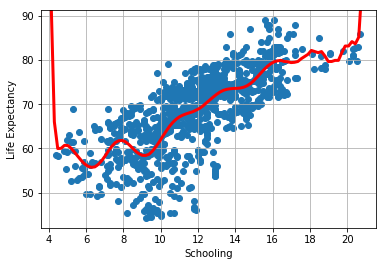

In [31]:
def plot_model_on_data(x, y, model=None):
    plt.scatter(x, y)
    if model is not None:
        xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
        line_x = np.linspace(xlim[0], xlim[1], 100)
        line_y = model.predict(line_x[:, None])
        plt.plot(line_x, line_y, c="red", lw=3)
        plt.xlim(xlim); plt.ylim(ylim)
    plt.grid()
    plt.xlabel("Schooling"); plt.ylabel("Life Expectancy")

plot_model_on_data(X_train, y_train, prm)

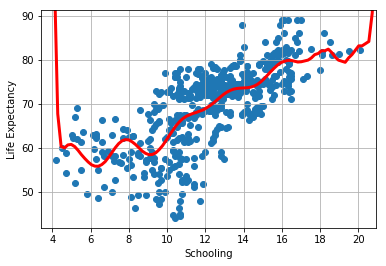

In [32]:
plot_model_on_data(X_val, y_val, prm)

Graficando il modello rispetto ai dati si nota come questo presenti delle forti oscillazioni agli estremi, peggiorando l'accuratezza del modello stesso. Questo è dovuto al fatto che più il polinomio utilizzato per approssimare i dati è di grado elevato e tanto maggiori saranno i suoi coefficienti.
Si procede dunque alla regolarizzazione del modello, si può notare infatti che per il momento agli estremi del dataset questo risulta particolarmente impreciso

- La **_regolarizzazione_** modifica la funzione d'errore su cui si basa l'addestramento, aggiungendo una penalità per valori estremi dei parametri del modello
- Nella regolarizzazione _L2_, la più comune, la penalità è proporzionale al quadrato della norma euclidea del vettore $\mathbf{\theta}$ dei parametri
  - in questo modo parametri molto alti in valore assoluto sono molto penalizzati
- La regressione _ridge_ consiste nella regressione lineare con applicata la regolarizzazione L2, utilizzando quindi la seguente funzione d'errore:
$$ E = \left\Vert\mathbf{X}\mathbf{\theta}-\mathbf{y}\right\Vert_2^2 + \alpha\left\Vert\mathbf{\theta}\right\Vert_2^2 $$
- $\alpha$ è un parametro impostabile dall'utente che controlla il "peso" della regolarizzazione, si è scelto pari a 1
  - tali parametri impostabili sono a volte detti _iperparametri_ per distinguerli dai parametri addestrabili del modello

In [33]:
from sklearn.linear_model import Ridge
rrm = Pipeline([
    ("poly",   PolynomialFeatures(degree=20, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=1))
])
rrm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=False, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

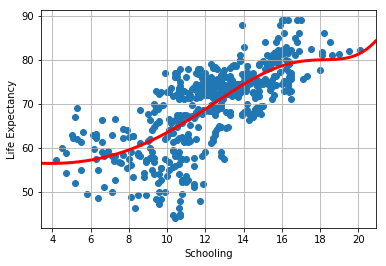

In [34]:
plot_model_on_data(X_val, y_val, rrm)

In [35]:
print_eval(X_train, y_train, rrm)

   Mean squared error: 33.706
       Relative error: 6.46543%
R-squared coefficient: 0.55192


In [36]:
print_eval(X_val, y_val, rrm)

   Mean squared error: 37.269
       Relative error: 6.91873%
R-squared coefficient: 0.54201


- Vediamo che le misure sul training set sono leggermente peggiori di quelle senza regolarizzazione, ma quelle sul validation set sono di poco migliori. 

- Questo perché, nonostante la regolarizzazione, pesa il fatto di aver considerato una sola feature nell'addestramento del modello. Per migliorare l'accuratezza è necessario utilizzare modelli di regressione multivariati.

# Regressione Multivariata
## Regressione Lineare Multivariata

In [37]:
led1 = led1.astype(float)
X_train, X_val, y_train, y_val = train_test_split(
    led1.drop("Lifeexpectancy", axis=1),    # X = tutto tranne Lifeexpectancy
    led1["Lifeexpectancy"],                 # y = Lifeexpectancy
    test_size=1/3, random_state=42          # parametri divisione
)

- Si è addestrato e valutato in prima istanza un modello lineare semplice

In [38]:
model_rlm = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
model_rlm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Validazione del Modello con il Metodo Hold-Out

In [39]:
print_eval(X_val, y_val, model_rlm)

   Mean squared error: 13.569
       Relative error: 4.18454%
R-squared coefficient: 0.83325


- Si nota un discreto miglioramento dei risultati rispetto a quelli del modello univariato

In [40]:
pd.Series(model_rlm.named_steps["linreg"].coef_, X_train.columns)

AdultMortality                  -2.030766
infantdeaths                    10.348530
Alcohol                         -0.362009
percentageexpenditure            0.904536
HepatitisB                      -0.163331
Measles                         -0.081274
BMI                              0.488627
under-fivedeaths               -10.493709
Polio                            0.171715
Totalexpenditure                 0.191764
Diphtheria                       0.306373
HIV/AIDS                        -2.728142
GDP                             -0.097354
Population                       0.050003
thinness1-19years               -0.208699
thinness5-9years                -0.200723
Incomecompositionofresources     1.549031
Schooling                        2.868373
dtype: float64

- Osservando i coefficienti del modello etichettati con i nomi delle colonne, si può dedurre il peso che ciascuna variabile ha nella predizione
- I pesi non dipendono dalla scala delle variabili in quanto è stata applicata la stadardizzazione

### Regressione Lasso
Mentre con la regolarizzazione L2 si impedisce che i parametri del modello assumano valori troppo alti, si utilizzano comunque tutte le variabili coinvolte nella predizione.
- Volendo addestrare un modello meno complesso, che ignori completamente le variabili meno rilevanti (alcuni parametri hanno valori nulli), si deve utilizzare la regolarizzazione L1, definita su un vettore $\mathbf{x}$ di $n$ elementi come
$$ \left\Vert\mathbf{x}\right\Vert_1 = \sum_{i=1}^n{\left\vert x_i\right\vert} = \left\vert x_1\right\vert+\ldots+\left\vert x_n\right\vert $$

- La regressione _lasso_ consiste nella regressione lineare con regolarizzazione L1, basata quindi sul minimizzare la funzione d'errore
$$ E = \frac{1}{2m}\left\Vert\mathbf{X}\mathbf{\theta}-\mathbf{y}\right\Vert_2^2 + \alpha\left\Vert\mathbf{\theta}\right\Vert_1 $$
- Come per la regressione ridge, il parametro $\alpha$ controlla il peso della regolarizzazione

In [41]:
from sklearn.linear_model import Lasso
model_lasso = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=2))
])
model_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

### Validazione del Modello con il Metodo Hold-Out

In [42]:
pd.Series(model_lasso.named_steps["linreg"].coef_, X_train.columns)

AdultMortality                 -1.789394
infantdeaths                   -0.000000
Alcohol                         0.000000
percentageexpenditure           0.000000
HepatitisB                      0.000000
Measles                        -0.000000
BMI                             0.000000
under-fivedeaths               -0.000000
Polio                           0.000000
Totalexpenditure                0.000000
Diphtheria                      0.000000
HIV/AIDS                       -1.418027
GDP                             0.000000
Population                     -0.000000
thinness1-19years              -0.000000
thinness5-9years               -0.000000
Incomecompositionofresources    0.998012
Schooling                       2.562976
dtype: float64

In [43]:
print_eval(X_val, y_val, model_lasso)

   Mean squared error: 25.042
       Relative error: 5.75567%
R-squared coefficient: 0.69226


- L'accuratezza è nettamente peggiore rispetto ai casi precedenti
- La regolarizzazione è stata eccessiva
- Diminuendo il parametro `alpha`, ovvero il peso della regolarizzazione, i coefficienti non nulli aumenteranno da 4 a 12

In [44]:
model_lasso = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=0.1)) # <-- cambiato da 2
])
model_lasso.fit(X_train, y_train)
sort_factors = pd.Series(model_lasso.named_steps["linreg"].coef_, X_train.columns)
sort_factors

AdultMortality                 -2.200096
infantdeaths                   -0.000000
Alcohol                        -0.237255
percentageexpenditure           0.702532
HepatitisB                     -0.000000
Measles                         0.000000
BMI                             0.497418
under-fivedeaths               -0.096101
Polio                           0.100510
Totalexpenditure                0.062573
Diphtheria                      0.321732
HIV/AIDS                       -2.674191
GDP                             0.000000
Population                      0.000000
thinness1-19years              -0.289924
thinness5-9years               -0.000000
Incomecompositionofresources    1.567463
Schooling                       2.858521
dtype: float64

Volendo fare delle considerazioni sui risultati, come premesso nell'introduzione, si possono suddividere le feature in 4 macro-categorie:
- **Fattori legati all'immunizzazione**:
    - HepatitisB
    - Measles
    - Polio 
    - Diphtheria
    - HIV/AIDS 
    
- **Fattori di mortalità**:
    - AdultMortality 
    - infantdeaths
    - under-fivedeaths 

- **Fattori economici**:
    - percentageexpenditure
    - Totalexpenditure
    - GDP
    - Incomecompositionofresources

- **Fattori sociali**:
    - Alcohol
    - BMI
    - Population
    - thinness1-19years
    - thinness5-9years
    - Schooling 

In [45]:
sort_factors = abs(pd.Series(model_lasso.named_steps["linreg"].coef_, X_train.columns)) # consideriamo il modulo
sort_factors.sort_values(ascending=False)

Schooling                       2.858521
HIV/AIDS                        2.674191
AdultMortality                  2.200096
Incomecompositionofresources    1.567463
percentageexpenditure           0.702532
BMI                             0.497418
Diphtheria                      0.321732
thinness1-19years               0.289924
Alcohol                         0.237255
Polio                           0.100510
under-fivedeaths                0.096101
Totalexpenditure                0.062573
Population                      0.000000
GDP                             0.000000
thinness5-9years                0.000000
Measles                         0.000000
HepatitisB                      0.000000
infantdeaths                    0.000000
dtype: float64

- Come previsto dall'analisi di correlazione tra le variabili svolta precedentemente, si osserva che i fattori più influenti sull'aspettativa di vita di un paese sono: la scolarizzazione, l'immunità all'HIV/AIDS, la mortalità in età adulta e l'indice di svilupppo umano
- Ai primi posti si trovano dunque feature derivanti da tutti e 4 i macro-gruppi, il che indica l'uguale imporantanza dei fattori di mortalità, sociale, economico e di immunizzazione per la stima dell'aspettativa di vita di un paese

In [46]:
print_eval(X_val, y_val, model_lasso)

   Mean squared error: 14.609
       Relative error: 4.32518%
R-squared coefficient: 0.82047


- L'accuratezza è simile a quella ottenuta col modello di regressione ridge
- Questo modello è però molto più semplice, in quanto si basa su 12 variabili invece di 18

### Elastic Net

- La regressione _elastic net_ combina insieme le regolarizzazioni L2 e L1 usate in ridge e lasso
- L'errore è calcolato come:
$$ E = \underbrace{\frac{1}{2m} ||X\theta - y||_2 ^ 2}_{\text{errore sui dati}} + \underbrace{\alpha \rho ||\theta||_1}_{\text{L1}} + \underbrace{\frac{\alpha(1-\rho)}{2} ||\theta||_2 ^ 2}_{\text{L2}} $$
- I parametri impostabili sono
  - `alpha` ($\alpha$) che determina il peso generale della regolarizzazione
  - `l1_ratio` ($\rho$, compreso tra 0 e 1) che determina il peso di L1 relativo al totale (con $\rho=1$ si ha la regressione lasso, con $\rho=0$ la ridge)

In [47]:
from sklearn.linear_model import ElasticNet
model_elastic = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=0.1, l1_ratio=0.8))
])
model_elastic.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

### Validazione del Modello con il Metodo Hold-Out

In [48]:
print_eval(X_val, y_val, model_elastic)

   Mean squared error: 14.556
       Relative error: 4.31863%
R-squared coefficient: 0.82112


- Il modello è leggermente migliorato rispetto al caso di regressione lasso, anche se naturalmente molto simile a causa del parametro l1_ratio impostato pari a 0.8
- Si già è raggiunto un MSE pari a circa 15, senza aver ancora effettuato il tuning dei parametri

## Regressione Polinomiale Multivariata
In presenza di più variabili, la regressione polinomiale genera tutti i possibili termini fino al grado impostato, includendo anche *termini basati su più variabili*

In [49]:
X_train.shape # 18 variabili, il problema è impegnativo perché poi diventano 189 feature distinte

(1099, 18)

In [50]:
model_rpm = Pipeline([
    ("poly",   PolynomialFeatures(degree=4, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=10000))
])
%time model_rpm.fit(X_train, y_train)

Wall time: 13.3 s


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

### Validazione del Modello con il Metodo Hold-Out

In [51]:
print_eval(X_val, y_val, model_rpm)

   Mean squared error: 10.185
       Relative error: 3.48574%
R-squared coefficient: 0.87484


- All'aumentare delle variabili, aumenta il tempo necessario per l'addestramento del modello
- Addestrando un modello di grado pari a 4, si ottiene ad esempio un notevole aumento dell'accuratezza del modello ma il tempo per addestrarlo aumenterà di paripasso.
    - In questo caso è stato necessario attendere circa 12 secondi

## Regressione con Funzioni Kernel
Nella regressione polinomiale si eseguono prodotti tra dati con dimensioni aggiunte e rappresentate esplicitamente mentre le _funzioni kernel_ permettono di calcolare gli stessi prodotti senza calcolare esplicitamente le dimensioni aggiunte.
- Questo permette di ottenere modelli non lineari senza l'aggiunta di variabili
- Una delle funzioni kernel, la polinomiale è definita dalla formula
$$ K(\mathbf{a},\mathbf{b}) = \left(\mathbf{a}\cdot\mathbf{b}+c\right)^d $$
  - $d$ e $c$ sono parametri del kernel, in particolare $d$ è il grado del polinomio

### Regressione con Kernel Polinomiale

In [52]:
from sklearn.kernel_ridge import KernelRidge
model_kernelP = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=2.5, kernel="poly", degree=4))
])
%time model_kernelP.fit(X_train, y_train)

Wall time: 201 ms


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', KernelRidge(alpha=2.5, coef0=1, degree=4, gamma=None, kernel='poly',
      kernel_params=None))])

### Validazione del Modello con il Metodo Hold-Out

In [53]:
print_eval(X_val, y_val, model_kernelP)

   Mean squared error: 9.8994
       Relative error: 2.95631%
R-squared coefficient: 0.87835


- Si è ottenuto un modello con un'accuratezza più elevata rispetto ai modelli lineari e in tempi molto più brevi rispetto alla regressione polinomiale

### Regressione con Kernel RBF (Radial Basis Function)
- RBF ha valori tanto più elevati quanto più i valori X sono vicini a 0 (ovvero la media, usando dati standardizzati)
- La funzione RBF ha la forma di una gaussiana, di cui si può impostare l'ampiezza col parametro `gamma`

In [54]:
model_kernelRBF = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=0.01, kernel="rbf", gamma=0.001))
])
%time model_kernelRBF.fit(X_train, y_train)

Wall time: 82.8 ms


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.001, kernel='rbf',
      kernel_params=None))])

### Validazione del Modello con il Metodo Hold-Out

In [55]:
print_eval(X_val, y_val, model_kernelRBF)

   Mean squared error: 11.046
       Relative error: 3.66761%
R-squared coefficient: 0.86426


- Il kernel RBF ha fornito risultati peggiori di quello polinomiale
    - Non è ancora stata eseguita la grid search

## Valutazione dei Modelli di Regressione
### k-Fold Cross Validation
Si utilizza ora, il metodo _k-fold_ per valutare l'accuratezza di un modello
  - i dati sono divisi causalmente in k gruppi (_fold_)
  - ciascun gruppo è validato su un modello addestrato su tutti gli altri gruppi
  - i risultati dei singoli test vengono uniti
  
Ridefiniamo X e y, variabili indipendenti e dipendente

In [56]:
X = led1.drop(["Lifeexpectancy"], axis=1)
y = led1["Lifeexpectancy"]

- Si genera un oggetto che genera 5 fold con dati mescolati casualmente

In [57]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=42)
from sklearn.model_selection import cross_val_score

- Tale valutazione è più affidabile di quella col metodo hold-out, ottenuta da un singolo modello
- Ci permette inoltre di valutare la "robustezza" del modello, ovvero quanto l'accuratezza sia stabile addestrandosi su set di dati diversi
- Si otterrà il risultato di `score`, ovvero il coefficiente R², calcolato su ciascun fold

#### Regressione Lineare Multivariata

In [58]:
scores_rlm = cross_val_score(model_rlm, X, y, cv=kf)
scores_rlm.mean(), scores_rlm.std()

(0.8252886707123791, 0.01949039456050135)

- Il punteggio medio dei modelli è 0.83 con una deviazione standard di 0.019

#### Regressione Lasso

In [59]:
scores_lasso = cross_val_score(model_lasso, X, y, cv=kf)
scores_lasso.mean(), scores_lasso.std()

(0.816200872757183, 0.014989457647879992)

- Il punteggio medio dei modelli è 0.82 con una deviazione standard di 0.015

#### Regressione Elastic Net

In [60]:
scores_elastic = cross_val_score(model_elastic, X, y, cv=kf)
scores_elastic.mean(), scores_elastic.std()

(0.816697405009208, 0.014970427601119331)

- Il punteggio medio dei modelli è 0.82 con una deviazione standard di 0.015

#### Regressione Polinomiale Multivariata

In [61]:
scores_rpm = cross_val_score(model_rpm, X, y, cv=kf)
scores_rpm.mean(), scores_rpm.std()

(0.8713864699431355, 0.014034402151823347)

- Il punteggio medio dei modelli è 0.87 con una deviazione standard di 0.014

#### Regressione Kernel Polinomiale

In [62]:
scores_kernelP = cross_val_score(model_kernelP, X, y, cv=kf)
scores_kernelP.mean(), scores_kernelP.std()

(0.8561557303211279, 0.06826275978245192)

- Il punteggio medio dei modelli è 0.90 con una deviazione standard di 0.015

#### Regressione Kernel RBF

In [63]:
scores_kernelRBF = cross_val_score(model_kernelRBF, X, y, cv=kf)
scores_kernelRBF.mean(), scores_kernelRBF.std()

(0.8690010724323305, 0.013607130292945505)

- Il punteggio medio dei modelli è 0.92 con una deviazione standard di 0.012
- La k-fold cross validation conferma i risultati ottenuti tramite il metodo hold-out

## Grid Search
Dato che l'accuratezza del modello può dipendere fortemente dai valori degli iperparametri, si procede ora alla ricerca dei loro valori migliori tramite la Grid Search

- Si intende dunque individuare i valori degli iperparametri che massimizzino l'accuratezza del modello
- Sono state testate una serie di griglie di parametri per ciascun modello
    - Si riportano di seguito solamente quelle che hanno fornito risultati migliori (ultima iterazione)

In [64]:
from sklearn.model_selection import GridSearchCV
def grid_test(model, grid):
    gs = GridSearchCV(model, param_grid=grid, cv=5, iid=False)
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    print_eval(X_val, y_val, gs)

#### Regressione Elastic Net

In [65]:
model_elastic_gs = ElasticNet(max_iter=10000)
grid_elastic_gs = {
    "alpha":    [0.08, 0.1, 0.12, 0.5],
    "l1_ratio": [0.8, 0.6, 1, 0.5, 2],
}
grid_test(model_elastic_gs, grid_elastic_gs)

{'alpha': 0.08, 'l1_ratio': 1}
   Mean squared error: 14.333
       Relative error: 4.30530%
R-squared coefficient: 0.82386


- I parametri migliori per il modello Elastic Net risultano essere:
    - $\alpha$ = 0.08
    - `l1_ratio` = 0.1
- L'accuratezza non è cambiata troppo rispetto al primo modello implementato

#### Regressione Kernel Polinomiale

In [66]:
model_kernelP_gs = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(kernel="poly"))
])
grid_kernelP_gs = {
    "regr__degree":   [2, 3, 4, 5],
    "regr__alpha":    [0.1, 1, 0.5, 1.5, 2, 2.5,],
}
grid_test(model_kernelP_gs, grid_kernelP_gs)

{'regr__alpha': 0.5, 'regr__degree': 2}
   Mean squared error: 7.6781
       Relative error: 2.93443%
R-squared coefficient: 0.90564


- I parametri migliori per il modello Kernel Polinomiale risultano essere:
    - $\alpha$ = 0.5
    - `grado` = 2

#### Regressione Kernel RBF

In [67]:
model_kernelRBF_gs = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(kernel="rbf"))
])
grid_kernelRBF_gs = {
    "regr__alpha":    [0.008, 0.01, 0.012],
    "regr__gamma":    [0.0002, 0.005, 0.0012, 0.0014],
}
grid_test(model_kernelRBF_gs, grid_kernelRBF_gs)

{'regr__alpha': 0.008, 'regr__gamma': 0.005}
   Mean squared error: 7.864
       Relative error: 2.87345%
R-squared coefficient: 0.90336


- I parametri migliori per il modello Kernel RBF risultano essere:
    - $\alpha$ = 0.008
    - `gamma` = 0.005

- Dopo la Grid Search, il modello risulta essere molto simile al Kernel Polinomiale in termini di accuratezza

### Grid Search su Modelli di Regressione basati su macro-categorie
Volendo fare ulteriori considerazioni sul contributo delle feature, come premesso nell'introduzionegià accennato nel paragrafo dedicato alla Regressione Lasso, si possono considerare 4 macro-categorie:
- Fattori legati all'immunizzazione
- Fattori di mortalità
- Fattori economici
- Fattori sociali 

Si valuta ora il loro contributo nella stima dell'aspettativa di vita eseguendo l'analisi sui singoli macro-gruppi di feature selezionate tramite **Kernel RBF**. Infatti, anche se il Kernel Polinomiale ha fornito risultati migliori con la Grid Search, il Kernel RBF si è adattato meglio a questo caso.

In [68]:
F_imm = led1[["HepatitisB","Measles","Polio","Diphtheria","HIV/AIDS"]]
F_mort = led1[["AdultMortality", "infantdeaths", "under-fivedeaths"]]
F_econ = led1[["percentageexpenditure","Totalexpenditure","GDP","Incomecompositionofresources"]]
F_soc = led1[["Alcohol","BMI","Population","thinness1-19years","thinness5-9years","Schooling"]]

In [69]:
def grid_test_macro(model, grid, F):
    X_train, X_val, y_train, y_val = train_test_split(
    F,    
    led1["Lifeexpectancy"],                
    test_size=1/3, random_state=42          
    )
    
    gs = GridSearchCV(model, param_grid=grid, cv=5, iid=False)
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    print_eval(X_val, y_val, gs)

#### Fattori legati all'immunizzazione - Kernel RBF

In [70]:
grid_test_macro(model_kernelRBF_gs, grid_kernelRBF_gs, F_imm)

{'regr__alpha': 0.008, 'regr__gamma': 0.005}
   Mean squared error: 31.867
       Relative error: 6.42006%
R-squared coefficient: 0.60839


#### Fattori di mortalità - Kernel RBF

In [71]:
grid_test_macro(model_kernelRBF_gs, grid_kernelRBF_gs, F_mort)

{'regr__alpha': 0.008, 'regr__gamma': 0.005}
   Mean squared error: 25.988
       Relative error: 5.41002%
R-squared coefficient: 0.68064


#### Fattori economici - Kernel RBF

In [72]:
grid_test_macro(model_kernelRBF_gs, grid_kernelRBF_gs, F_econ)

{'regr__alpha': 0.008, 'regr__gamma': 0.005}
   Mean squared error: 22.729
       Relative error: 5.40250%
R-squared coefficient: 0.72068


#### Fattori sociali - Kernel RBF

In [73]:
grid_test_macro(model_kernelRBF_gs, grid_kernelRBF_gs, F_soc)

{'regr__alpha': 0.008, 'regr__gamma': 0.005}
   Mean squared error: 26.812
       Relative error: 5.75535%
R-squared coefficient: 0.67051


Da questa analisi si deduce come i fattori economici e di mortalità risultino i più rilevanti per la stima dell'aspettativa di vita. In questi due gruppi infatti, ci sono alcune tra le feature con la correlazione più alta rispetto alla Lifeexpectancy, come:
- AdultMortality per il macro-gruppo relativo ai fattori di mortalità
- Incomecompositionofresources per il macro-gruppo facente riferimento ai fattori economici 


## Conclusione
Come mostrato nella tabella riassuntiva, il modello migliore ottenuto dalle analisi svolte finora risulta essere il **Kernel Polinomiale**, derivante dall'ultima Grid Search eseguita, i cui parametri di ricerca sono stati affinati di volta in volta. Questo si differenzia solo leggermente dal Kernel RBF, di solito di più comune utilizzo
- Si riporta una tabella riassuntiva dei risultati ottenuti dalle validazioni sui modelli più rilevati testati

In [74]:
vett = [model_rlm, model_lasso, model_elastic, model_rpm, model_kernelP, model_kernelRBF, model_elastic_gs, model_kernelP_gs, model_kernelRBF_gs]
score = [scores_rlm, scores_lasso, scores_elastic, scores_rpm, scores_kernelP, scores_kernelRBF, grid_elastic_gs, grid_kernelP_gs, grid_kernelRBF_gs]
m1 = np.empty((9,5))
m1[:] = np.nan
for i in range(0, 6):
    m1[i][0] = mean_squared_error(vett[i].predict(X_val), y_val)
    m1[i][1] = relative_error(vett[i].predict(X_val), y_val)
    m1[i][2] = vett[i].score(X_val, y_val) 
    m1[i][3] = score[i].mean()
    m1[i][4] = score[i].std()

for i in range(6,9):
    m1[i][0] = mean_squared_error(GridSearchCV(vett[i], param_grid=score[i],cv=5, iid=False).fit(X_train, y_train).predict(X_val), y_val)
    m1[i][1] = relative_error(GridSearchCV(vett[i], param_grid=score[i],cv=5, iid=False).fit(X_train, y_train).predict(X_val), y_val)
    m1[i][2] = GridSearchCV(vett[i], param_grid=score[i], cv=5, iid=False).fit(X_train, y_train).score(X_val, y_val)
    
    
modelli =  ["RLM", "Lasso", "Elastic", "RPM", "KerP", "KerRBF", "Elastic_gs", "kernelP_gs", "kernel_gs"]

risultati = [["VALIDAZIONE HOLD-OUT", "VALIDAZIONE HOLD-OUT","VALIDAZIONE HOLD-OUT", "VALIDAZIONE K-FOLD", "VALIDAZIONE K-FOLD"],
              ["MSE", "RelEr", "R-squared", "MediaR", "DevR"]]

tuples = list(zip(*risultati))
pip = pd.MultiIndex.from_tuples(tuples)

df1 = pd.DataFrame(m1, index = modelli , columns = pip)
df1 

VALIDAZIONE HOLD-OUT                     VALIDAZIONE K-FOLD  \
                            MSE     RelEr R-squared             MediaR   
RLM                   13.568827  0.041845  0.833255           0.825289   
Lasso                 14.608826  0.043252  0.820474           0.816201   
Elastic               14.556482  0.043186  0.821118           0.816697   
RPM                   10.185004  0.034857  0.874838           0.871386   
KerP                   9.899366  0.029563  0.878348           0.856156   
KerRBF                11.046062  0.036676  0.864257           0.869001   
Elastic_gs            14.333410  0.043053  0.823859                NaN   
kernelP_gs             7.678124  0.029344  0.905645                NaN   
kernel_gs              7.864046  0.028734  0.903360                NaN   

                      
                DevR  
RLM         0.019490  
Lasso       0.014989  
Elastic     0.014970  
RPM         0.014034  
KerP        0.068263  
KerRBF      0.013607  
Elastic_gs       NaN  
kernelP_gs       NaN  
kernel_gs        NaN

Nel seguente istogramma sono mostrate, in ordine decrescente, le dirette e inverse proporzionalità delle singole feature con l'Aspettativa di Vita

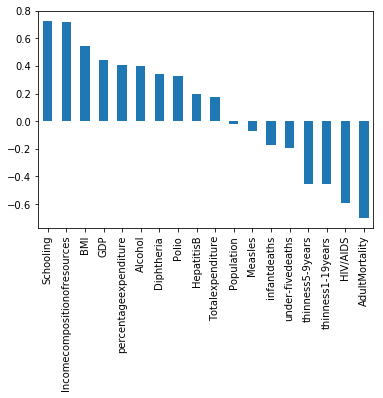

In [75]:
df["Lifeexpectancy"][1:].sort_values(ascending=False).plot.bar()

- Si vuole ora individure un modello, tramite Regressione Kernel Polinomiale, che prenda in considerazione le sole feature considerate più rilevanti
    - Le restanti verranno considerate rumore e tralasciate
- Si definisce il modello con i parametri trovati tramite la Grid Search
- Vengono selezionate solo le feature con un peso "maggiore" sulla Life expectancy

In [76]:
model_kernelP = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=0.5, kernel="poly", degree=2))
])

In [77]:
golden_features = df_num_corr[abs(df_num_corr) > 0.40].sort_values(ascending=False)
print("Ecco le {} feature più correlate con l'Aspettativa di Vita:\n{}".format(len(golden_features), golden_features))
f_selected = abs(df_num_corr) > 0.40
led_selected0 = led[f_selected.index[f_selected]]
led_selected0.head(4)

Ecco le 10 feature più correlate con l'Aspettativa di Vita:
Schooling                       0.727630
Incomecompositionofresources    0.721083
BMI                             0.542042
GDP                             0.441322
percentageexpenditure           0.409631
Alcohol                         0.402718
thinness5-9years               -0.457508
thinness1-19years              -0.457838
HIV/AIDS                       -0.592236
AdultMortality                 -0.702523
Name: Lifeexpectancy, dtype: float64


,AdultMortality,Alcohol,percentageexpenditure,BMI,HIV/AIDS,GDP,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,263.0,0.01,71.279624,19.1,0.1,584.259210,17.2,17.3,0.479,10.1
1,271.0,0.01,73.523582,18.6,0.1,612.696514,17.5,17.5,0.476,10.0
2,268.0,0.01,73.219243,18.1,0.1,631.744976,17.7,17.7,0.470,9.9
3,272.0,0.01,78.184215,17.6,0.1,669.959000,17.9,18.0,0.463,9.8


In [78]:
X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(
    led_selected0,
    led1["Lifeexpectancy"],  
    test_size=1/3, random_state=42 
)

In [79]:
model_kernelP.fit(X_train_sel, y_train_sel)
print_eval(X_val_sel, y_val_sel, model_kernelP)

   Mean squared error: 7.6472
       Relative error: 2.95905%
R-squared coefficient: 0.90603


- Si ricorda che i valori ottenuti utilizzando tutte le feature a disposizione, con lo stesso tipo di regressione e gli stessi parametri (trovati tramite la Grid Search) erano:
    - Mean squared error: 7.678124	
    - Relative error: 2.9344%	
    - R-squared coefficient: 0.905645
    
- I risultati ottenuti utilizzando soltanto le feature individuate come più rilevanti sono quindi molto simili a quelli ottenuti utilizzandole tutte
    - Le feature scartate in questa fase possono dunque essere considerate circa come "rumore"
    - Ripetiamo l'analisi, riducendo ulteriormente il numero di feature cosiderate

In [80]:
golden_features = df_num_corr[abs(df_num_corr) > 0.50].sort_values(ascending=False)
print("Ecco le {} feature più correlate con l'Aspettativa di Vita:\n{}".format(len(golden_features), golden_features))
f_selected = abs(df_num_corr) > 0.50
led_selected1 = led[f_selected.index[f_selected]]
led_selected1.head(4)

Ecco le 5 feature più correlate con l'Aspettativa di Vita:
Schooling                       0.727630
Incomecompositionofresources    0.721083
BMI                             0.542042
HIV/AIDS                       -0.592236
AdultMortality                 -0.702523
Name: Lifeexpectancy, dtype: float64


,AdultMortality,BMI,HIV/AIDS,Incomecompositionofresources,Schooling
0,263.0,19.1,0.1,0.479,10.1
1,271.0,18.6,0.1,0.476,10.0
2,268.0,18.1,0.1,0.470,9.9
3,272.0,17.6,0.1,0.463,9.8


In [81]:
X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(
    led_selected1,
    led1["Lifeexpectancy"],  
    test_size=1/3, random_state=42 
)

In [82]:
model_kernelP.fit(X_train_sel, y_train_sel)
print_eval(X_val_sel, y_val_sel, model_kernelP)

   Mean squared error: 8.6356
       Relative error: 3.22214%
R-squared coefficient: 0.89388


- Confrontando ancora questi valori con quelli ottenuti utilizzando tutte le feature, che erano:
    - Mean squared error: 7.678124	
    - Relative error: 2.9344%	
    - R-squared coefficient: 0.905645
    
- Si ottiene un modello di poco peggiore a quello precedentemente generato ma che fa uso di un numero nettamente inferiore di feature
    - Il modello però è decisamente più semplice
    - Si sono dunque individuate le feature più rilevanti per la stima dell'aspettativa di vita, che sono in ordine:
        - Schooling
        - Incomecompositionofresources
        - BMI
        - HIV/AIDS
        - AdultMortality

In [83]:
model_kernelRBF = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=0.008, kernel="rbf", gamma=0.005))
])
model_kernelRBF.fit(X_train_sel, y_train_sel)
print_eval(X_val_sel, y_val_sel, model_kernelRBF)

   Mean squared error: 8.4574
       Relative error: 3.14669%
R-squared coefficient: 0.89607


In [84]:
model_elastic = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=0.08, l1_ratio=1))
])
model_elastic.fit(X_train_sel, y_train_sel)
print_eval(X_val_sel, y_val_sel, model_elastic)

   Mean squared error: 15.382
       Relative error: 4.38761%
R-squared coefficient: 0.81098


- Ripetendo l'analisi dei 3 modelli individuati come i più adatti al nostro caso con le poche feature individuate, si conferma di nuovo il risultato ottenuto in precedenza
    - Kernel Polinomiale e Kernel RBF forniscono dunque risultati molto simili
    - Elastic Net si conferma meno efficace (ma più semplice in quanto lineare)
- Essendo in questo caso, il numero di feature utilizzate ancora inferiore al precedente si è realizzata una grossa semplificazione dell'analisi
- Si valuta ora la correlazione tra le feature selezionate

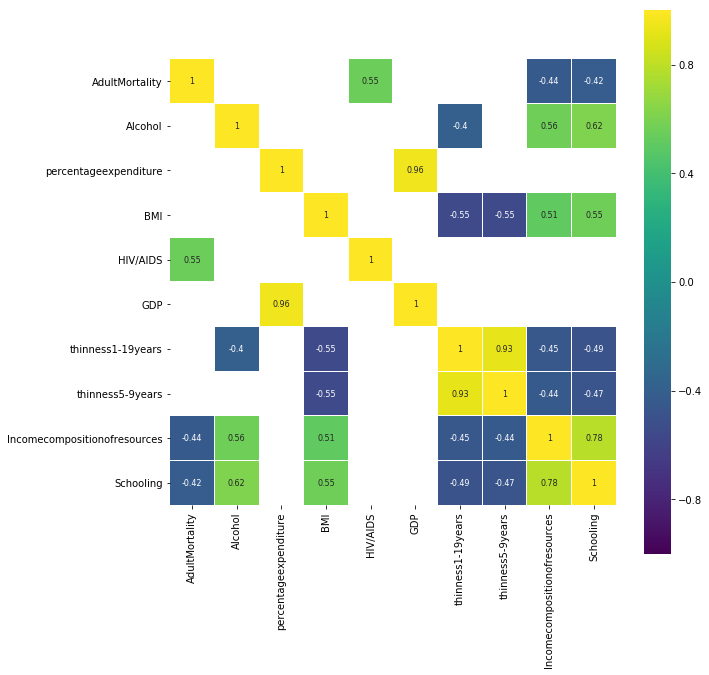

In [85]:
plt.figure(figsize=(10, 10))
df_selected = led_selected0.corr()
sns.heatmap(df_selected[(df >= 0.5) | (df<= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- Analizzano la correlazione tra le feature selezionate, si nota la forte proporzionalità tra 
    - Schooling e Incomecompositionofresources
    - thinness5-9years e thinness1-19years
    - GDP e percentageexpenditure
- Si ripete dunque l'analisi con Kernel Polinomiale scartando una feature per ognuna delle coppie citate (quella con la correlazione minore rispetto a Life expectancy) prevedendo che il risultato finale non cambierà di troppo
- Per non ridurre eccessivamente il numero di feature utilizzate, si riprende dal punto in cui erano state ridotte a 10

In [86]:
led_selected0.drop(["Incomecompositionofresources", "thinness5-9years", "GDP"], axis=1, inplace=True)
X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(
    led_selected0,
    led1["Lifeexpectancy"],  
    test_size=1/3, random_state=42 
)
led_selected0.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,AdultMortality,Alcohol,percentageexpenditure,BMI,HIV/AIDS,thinness1-19years,Schooling
0,263.0,0.01,71.279624,19.1,0.1,17.2,10.1
1,271.0,0.01,73.523582,18.6,0.1,17.5,10.0
2,268.0,0.01,73.219243,18.1,0.1,17.7,9.9
3,272.0,0.01,78.184215,17.6,0.1,17.9,9.8
4,275.0,0.01,7.097109,17.2,0.1,18.2,9.5


In [87]:
model_kernelP.fit(X_train_sel, y_train_sel)
print_eval(X_val_sel, y_val_sel, model_kernelP)

   Mean squared error: 10.537
       Relative error: 3.57741%
R-squared coefficient: 0.87051


- Senza queste 3 feature, pur utilizzandone comunque 7 tra le più importanti, il modello risulta notevolmente peggiorato anche rispetto al caso in cui era stato addestrato solo sul 5 feature 
    - Se ne deduce che la correlazione per le 3 coppie di feature citate non è sufficiente a giustificare la rimozione di una delle stesse (per coppia) dall'analisi, in quanto influisce comunque notevolmente sulla stima della Life expectancy

## Confronto con il Gold Standard: Random Forest

L'algoritmo Random Forest è un ottimo esempio di ensemble learning, basato sull'aggregazione dei risultati di un insieme di stimatori più semplici. La somma dei risultati forniti da questi è di solito migliore rispetto a quelli forniti dai singoli stimatori. 

L'overfitting risulta essere una proprietà generale degli alberi decisionali. È infatti molto facile andare troppo in profondità nell'albero e di conseguenza adattarsi ai dettagli dei dati specifici piuttosto che alle proprietà generali delle distribuzioni da cui sono tratti. Noto questo problema, con il Random Forest, ci si avvale della possibilità di combinare più stimatori per ridurre l'effetto di overfitting sopracitato. 

Questo metodo fa dunque uso di un insieme di stimatori paralleli, ognuno dei quali affetto da overfitting, e ne calcola una media dei risultati per trovare il modello migliore. L'insieme di alberi decisionali randomizzati è noto come Random Forest.
In conclusione, si è scelto di utilizzare il Random Forest come modello di riferimento, per paragonare i risultati ottenuti in questo elaborato con un metodo robusto e consolidato.

In [88]:
from sklearn.ensemble import RandomForestRegressor # da Piter
model_RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1,)
model_RFR.fit(X_train, y_train.ravel())
# model_RFR.score(X_train, y_train.ravel())
print_eval(X_val, y_val, model_RFR)

   Mean squared error: 4.0911
       Relative error: 1.84576%
R-squared coefficient: 0.94972


- I valori ottenuti utilizzando tutte le feature a disposizione, con lo stesso tipo di regressione e gli stessi parametri (trovati tramite la Grid Search) erano:
    - Mean squared error: 7.678124	
    - Relative error: 2.9344%	
    - R-squared coefficient: 0.905645

I risultati ottenuti tramite la Regressione Kernel Polinomiale non si discostano troppo dall'accuratezza esibita dal modello addestrato tramite Random Forest.